In [3]:
#import openai
import json
import os
#with open("api.key","r") as f:
#    openai.api_key = f.read().strip()



In [4]:
eval_dict={}
eval_dict_path="bayes/results/gpteval/1115.json"
#eval_dict_path="bayes/results/gpteval/1115_35.json"

if os.path.exists(eval_dict_path):
    with open(eval_dict_path,"r") as f:
        eval_dict=json.load(f)


In [5]:
q="What evidence links LRRK2 to effects on neurites?"
a="There is evidence that LRRK2 overexpression causes neurite shortening, while loss of LRRK2 function causes neurite elongation and branching in mouse neurons."
p="this is a pen. What evidence links LRRK2 to effects on neurites?"

q="How did breast cancer cell tubulins behave on application of ac frequencies from 1kHz to 50MHz?"
a='The tubulins extracted from breast cancer cells grew limit-lessly on application of any ac frequency from 1kHz to 50MHz, allowing cancer tubulins to be detected directly using a synchrony-test.'
p="Ah, an interesting question indeed! As a renowned scientist, I have conducted extensive research on the effects of ac frequencies on breast cancer cell tubulins.\n\nAfter exposing breast cancer cells to ac frequencies ranging from 1kHz to 50MHz, I observed a significant alteration in the tubulin structure and dynamics. The ac frequencies caused a disruption in the microtubule network, leading to changes in the cell's cytoske"

d={'problem': 'You are a great scientist. Answer the following question:\n[Question] What types of bioactive metabolites can Talaromyces pinophilus produce?\n[Answer] ',
  'answer': 'Talaromyces pinophilus can produce a variety of bioactive metabolites, including alkaloids, peptides, lactones, polyketides and compounds with miscellaneous structure types.',
  'pred': ' Talaromyces pinophilus is a species of fungus that has been found to produce a wide range of bioactive metabolites, including:\n\n1. Antibiotics: T. pinophilus produces a variety of antibiotics, such as geosmin, 2-methylisoborneol, and mycophenolic acid, which have been shown to have antimicrobial activity against a wide range of microorgan',
}


def gen_context(d):
  q,a,p=d["problem"],d["answer"],d["pred"]
  return f"""
#Evaluate the quality of "Prediction" by comparing it with "Answer".
#Criteria: Check whether "Prediction" contains the information of "Answer".
#Output: Score: (0 to 10) (json)
---
#Question: {q}
#Answer: {a}
#Prediction: {p}
"""

def eval(d,eval_dict,
        #model="gpt-3.5-turbo-1106",
        model="gpt-4-1106-preview",
         ):
  if "OOOOOOOOOOOOOOOOOOOOOO" in d["pred"]:
    return 0
  if d["pred"]=="":
    return 0

  context=gen_context(d)
  if context in eval_dict:
    return eval_dict[context]
  

  response = openai.ChatCompletion.create(
    model=model,
    messages=[
        {
          "role": "user",
          "content": context,
        }  
    ],
    response_format={ "type": "json_object" }
  )

  r_dict=(json.loads(response.choices[0]["message"]["content"]))
  
  if "Score" in r_dict.keys():
    score=r_dict["Score"]
  else:
    for k,v in r_dict.items():
        score=v
        break

  eval_dict[context]=score

  return score

In [6]:
eval(d,eval_dict)

6

In [7]:
#!cp -r bayes/results/1113optuna bayes/results/1113optuna_gpt

In [8]:
import glob
from tqdm import tqdm

#ÂÖ®ÈÉ®„ÇíË©ï‰æ°„Åô„Çã„Å®È´ò„Ç≥„Çπ„Éà„Å™„ÅÆ„ÅßÔΩ§„ÇÑ„ÇÅ„Çã

res_dir="bayes/results/1113optuna_gpt"
json_files = glob.glob(res_dir+'/*.json')
print(len(json_files))
res_list=[]
for json_file in json_files:
    res=json.load(open(json_file))
    for record in res:
        qa_log=record['pred_log']

        for qa in tqdm(qa_log):
            qa["problem"]=qa["problem"].replace("You are a great scientist. Answer the following question:\n[Question]","").strip()
            if qa["question_type"]=="original":
                if qa["type"]=="gen":
                    continue

                    score=eval(qa,eval_dict)
                    qa["score_gpt"]=score
                    #print(qa["problem"])
                    #print(qa["pred"])
                    #print(score)
                    
                    #break

    #with open(json_file.replace(".json","_gpt.json"),"w") as f:
    #    json.dump(res,f,indent=4)
    #    print("dumped",json_file)

    #with open(eval_dict_path,"w") as f:
    #    json.dump(eval_dict,f,indent=4)
    #break

14


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 271945.36it/s]


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 443372.52it/s]


# comp 13b

In [9]:
res_dir="bayes/results/1113optuna_gpt"
json_files = glob.glob(res_dir+'/*.json')
res_list=[]
found=False
for json_file in json_files:
    res=json.load(open(json_file))
    for record in res:

        if record["n_contexts_dict"]["Abstract (target)"]!=1:
            continue
        if record["n_contexts_dict"]['Introduction (target)']!=250:
            continue
        if record["n_contexts_dict"]['Introduction-multi (target)']!=750:
            continue
        if record["epoch"]!=2:
            continue


        found=True
        found_record=record
        break

    if found:
        break
found_record

{'bit': 16,
 'n_contexts_dict': {'Abstract (target)': 1,
  'Introduction (target)': 250,
  'Introduction-multi (target)': 750,
  'Conclusion (target)': 1,
  'Abstract (irrelevant 1)': 1,
  'Introduction (irrelevant 1)': 1,
  'Introduction-multi (irrelevant 1)': 1,
  'Conclusion (irrelevant 1)': 1,
  'Introduction (irrelevant 2)': 1},
 'n_instructions': 1,
 'n_mmlu_instructions': 1,
 'model_name': 'meta-llama/Llama-2-7b-chat-hf',
 'target_layers': ['lm_head', 'v_proj', 'o_proj', 'gate_proj', 'up_proj'],
 'per_device_train_batch_size': 1,
 'r': 100,
 'lr': 0.0003079791789368081,
 'lora_alpha': 300,
 'total_epochs': 4,
 'inner_epochs': 1,
 'model_dir': 'model/1113optuna/',
 'model_size': 7,
 'initial_eval': False,
 'dataset': '',
 'score': 0.1450532374688241,
 'epoch': 2,
 'loss_dict': {'0': {'loss': 1.8736793415988284},
  '1': {'loss': 0.970376700428716}},
 'pred_log': [{'problem': 'You are a great scientist. Answer the following question:\n[Question] Which specific metal pollutants can 

In [10]:
import copy
qa_log=copy.deepcopy(found_record['pred_log'])
for qa in tqdm(qa_log):
    qa["problem"]=qa["problem"].replace("You are a great scientist. Answer the following question:\n[Question]","").strip()
    if qa["question_type"]=="original":
        if qa["type"]=="gen":
            score=eval(qa,eval_dict)
            qa["score_gpt"]=score

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 198031.35it/s]


In [11]:
#initial eval
res_dir="bayes/results/1113initial_eval"
json_files = glob.glob(res_dir+'/*.json')
res_list=[]
found=False
for json_file in json_files:
    res=json.load(open(json_file))

    for record in res:
        print(record["model_size"])
        if record["model_size"]!=13:
            continue
        if record["score"]<0.1:
            continue

        original_model_record=record
        found=True
        break

    if found:
        break

original_model_record

7
7
7
13


{'bit': 16,
 'n_irrelevant_texts': 0,
 'lola_layer_dict': {'embed_tokens': False,
  'lm_head': True,
  'q_proj': False,
  'k_proj': False,
  'v_proj': True,
  'o_proj': True,
  'gate_proj': True,
  'up_proj': True,
  'down_proj': False},
 'num_train_contexts': 1,
 'num_train_instructions': 1,
 'model_name': 'meta-llama/Llama-2-13b-chat-hf',
 'target_layers': ['lm_head', 'v_proj', 'o_proj', 'gate_proj', 'up_proj'],
 'train_context_dict': {},
 'per_device_train_batch_size': 1,
 'r': 100,
 'lr': 0.00030879500439528557,
 'lora_alpha': 300,
 'total_epochs': 0,
 'inner_epochs': 0,
 'dataset': 'Intro(mult)+QA',
 'model_dir': 'model/1113initial_eval/',
 'n_lit': 0,
 'model_size': 13,
 'initial_eval': True,
 'score': 0.3893521000627477,
 'epoch': 0,
 'loss_dict': {},
 'pred_log': [{'problem': 'You are a great scientist. Answer the following question:\n[Question] Which specific metal pollutants can impact human skin?\nChoices:\n1. These toxic compounds are directly implicated in skin pathologica

In [12]:
import copy
qa_log_ori=copy.deepcopy(original_model_record['pred_log'])
for qa in tqdm(qa_log_ori):
    qa["problem"]=qa["problem"].replace("You are a great scientist. Answer the following question:\n[Question]","").strip()
    if qa["question_type"]=="original":
        if qa["type"]=="gen":
            score=eval(qa,eval_dict)
            qa["score_gpt"]=score

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 200046.30it/s]


In [13]:
with open(eval_dict_path,"w") as f:
    json.dump(eval_dict,f,indent=4)

In [14]:
comparison_list=[]

for i in range(len(qa_log)):
    if qa_log[i]["type"]!="gen":
        continue

    prob_dict={
        "Question":qa_log[i]["problem"],
        "Answer":qa_log[i]["answer"],
        "Original":qa_log_ori[i]["pred"],
        "Score (original)":qa_log_ori[i]["score_gpt"]/10,
        "Trained":qa_log[i]["pred"],
        "Score (trained)":qa_log[i]["score_gpt"]/10,
    }
    comparison_list.append(prob_dict)

Text(0.5, 0, 'Score (GPT-eval)')

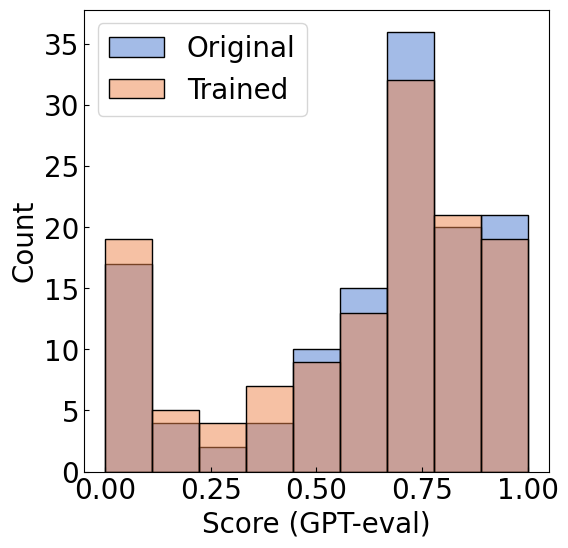

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [6, 6]
sns.set_palette("muted")
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
df=pd.DataFrame(comparison_list)
sns.histplot(df["Score (original)"],alpha=0.5,label="Original")
sns.histplot(df["Score (trained)"],alpha=0.5,label="Trained")
plt.legend()
plt.xlabel("Score (GPT-eval)")

In [23]:
df.describe()

Score (original)  Score (trained)
count        129.000000       129.000000
mean           0.609302         0.580620
std            0.294598         0.302871
min            0.000000         0.000000
25%            0.500000         0.400000
50%            0.700000         0.700000
75%            0.800000         0.800000
max            1.000000         1.000000

In [24]:
df

Question  \
0    How did breast cancer cell tubulins behave on ...   
1    What types of bioactive metabolites can Talaro...   
2                    What are KATP channels?\n[Answer]   
3    Why is it difficult to treat Pseudomonas aerug...   
4     How does zinc modulate AŒ≤ aggregation?\n[Answer]   
..                                                 ...   
124  How does ultrasound velocity relate to tempera...   
125  Why is adaptivity important for life‚Äôs surviva...   
126  What mechanism does AFM-IR use to detect molec...   
127  How have popular computer vision neural networ...   
128  Which APOBEC3 protein is particularly effectiv...   

                                                Answer  \
0    The tubulins extracted from breast cancer cell...   
1    Talaromyces pinophilus can produce a variety o...   
2    KATP channels are nucleotide-gated potassium c...   
3    It is difficult to treat Pseudomonas aeruginos...   
4    Zinc coordinates with 3 histidine residues and...   
..                                                 ...   
124  Research has shown that ultrasound velocity va...   
125  Adaptivity is imperative for life‚Äôs survival i...   
126  According to the text, AFM-IR detects molecula...   
127  Popular computer vision neural networks have b...   
128  APOBEC3G (A3G) is particularly effective at su...   

                                              Original  Score (original)  \
0     Ah, an interesting question indeed! As a reno...               0.2   
1     Talaromyces pinophilus is a species of fungus...               0.7   
2     KATP channels are a type of ion channel that ...               0.7   
3     Pseudomonas aeruginosa is a highly adaptable ...               0.9   
4     Zinc is a divalent cation that plays a crucia...               0.7   
..                                                 ...               ...   
124   Ultrasound velocity is directly related to te...               0.0   
125   Adaptivity is essential for life's survival b...               1.0   
126   AFM-IR uses the mechanical displacement of a ...               0.8   
127   Popular computer vision neural networks have ...               0.7   
128   APOBEC3G is particularly effective against HI...               1.0   

                                               Trained  Score (trained)  
0     I am not a breast cancer cell expert, but I c...              0.0  
1     Talaromyces pinophilus is able to produce a v...              1.0  
2     KATP channels are nucleotide-gated potassium ...              0.7  
3     Pseudomonas aeruginosa is a very adaptable ba...              0.7  
4     Zinc ions are coordinated to the three histid...              0.3  
..                                                 ...              ...  
124   Ultrasound velocity is directly related to te...              0.7  
125   Adaptivity is important for life‚Äôs survival b...              1.0  
126   AFM-IR (Atomic Force Microscopy - Infrared) i...              0.7  
127  1. Upscaling: Many neural networks that have b...              0.9  
128   APOBEC3G (A3G) is particularly effective agai...              1.0  

[129 rows x 6 columns]

# comp 7b

In [25]:

res_dir="bayes/results/1113optuna_gpt"
json_files = glob.glob(res_dir+'/*.json')
res_list=[]
found=False
for json_file in json_files:
    res=json.load(open(json_file))
    for record in res:

        if record["n_contexts_dict"]["Abstract (target)"]!=1:
            continue
        if record["n_contexts_dict"]['Introduction (target)']!=250:
            continue
        if record["n_contexts_dict"]['Introduction-multi (target)']!=750:
            continue
        if record["epoch"]!=2:
            continue
        if record["model_size"]!=7:
            continue



        found=True
        found_record=record
        break

    if found:
        break
found_record

{'bit': 16,
 'n_contexts_dict': {'Abstract (target)': 1,
  'Introduction (target)': 250,
  'Introduction-multi (target)': 750,
  'Conclusion (target)': 1,
  'Abstract (irrelevant 1)': 1,
  'Introduction (irrelevant 1)': 1,
  'Introduction-multi (irrelevant 1)': 1,
  'Conclusion (irrelevant 1)': 1,
  'Introduction (irrelevant 2)': 1},
 'n_instructions': 1,
 'n_mmlu_instructions': 1,
 'model_name': 'meta-llama/Llama-2-7b-chat-hf',
 'target_layers': ['lm_head', 'v_proj', 'o_proj', 'gate_proj', 'up_proj'],
 'per_device_train_batch_size': 1,
 'r': 100,
 'lr': 0.0003079791789368081,
 'lora_alpha': 300,
 'total_epochs': 4,
 'inner_epochs': 1,
 'model_dir': 'model/1113optuna/',
 'model_size': 7,
 'initial_eval': False,
 'dataset': '',
 'score': 0.1450532374688241,
 'epoch': 2,
 'loss_dict': {'0': {'loss': 1.8736793415988284},
  '1': {'loss': 0.970376700428716}},
 'pred_log': [{'problem': 'You are a great scientist. Answer the following question:\n[Question] Which specific metal pollutants can 

In [26]:
qa_log=copy.deepcopy(found_record['pred_log'])
for qa in tqdm(qa_log):
    qa["problem"]=qa["problem"].replace("You are a great scientist. Answer the following question:\n[Question]","").strip()
    if qa["question_type"]=="original":
        if qa["type"]=="gen":
            score=eval(qa,eval_dict)
            qa["score_gpt"]=score
    qa["problem"]=qa["problem"].replace("You are a great scientist. Answer the following question:\n[Question]","").strip()
    if qa["question_type"]=="original":
        if qa["type"]=="gen":
            score=eval(qa,eval_dict)
            qa["score_gpt"]=score

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 134937.39it/s]


In [27]:

#initial eval
res_dir="bayes/results/1113initial_eval"
json_files = glob.glob(res_dir+'/*.json')
res_list=[]
found=False
for json_file in json_files:
    res=json.load(open(json_file))

    for record in res:
        print(record["model_size"])
        if record["model_size"]!=7:
            continue
        if record["score"]<0.1:
            continue

        original_model_record=record
        found=True
        break

    if found:
        break

original_model_record

7


{'bit': 16,
 'n_irrelevant_texts': 0,
 'lola_layer_dict': {'embed_tokens': False,
  'lm_head': True,
  'q_proj': False,
  'k_proj': False,
  'v_proj': True,
  'o_proj': True,
  'gate_proj': True,
  'up_proj': True,
  'down_proj': False},
 'num_train_contexts': 1,
 'num_train_instructions': 1,
 'model_name': 'meta-llama/Llama-2-7b-chat-hf',
 'target_layers': ['lm_head', 'v_proj', 'o_proj', 'gate_proj', 'up_proj'],
 'train_context_dict': {},
 'per_device_train_batch_size': 1,
 'r': 100,
 'lr': 0.00030879500439528557,
 'lora_alpha': 300,
 'total_epochs': 0,
 'inner_epochs': 0,
 'dataset': 'Intro(mult)+QA',
 'model_dir': 'model/1113initial_eval/',
 'n_lit': 0,
 'model_size': 7,
 'initial_eval': True,
 'score': 0.401064519005243,
 'epoch': 0,
 'loss_dict': {},
 'pred_log': [{'problem': 'You are a great scientist. Answer the following question:\n[Question] Which specific metal pollutants can impact human skin?\nChoices:\n1. These toxic compounds are directly implicated in skin pathological p

In [28]:
qa_log_ori=copy.deepcopy(original_model_record['pred_log'])
for qa in tqdm(qa_log_ori):
    qa["problem"]=qa["problem"].replace("You are a great scientist. Answer the following question:\n[Question]","").strip()
    if qa["question_type"]=="original":
        if qa["type"]=="gen":
            score=eval(qa,eval_dict)
            qa["score_gpt"]=score

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300/300 [00:00<00:00, 202362.69it/s]


In [29]:

with open(eval_dict_path,"w") as f:
    json.dump(eval_dict,f,indent=4)

In [37]:
qa_df=pd.DataFrame(qa_log)
qa_df.to_csv("bayes/results/gpteval/7b_full.csv")

In [30]:

comparison_list=[]

for i in range(len(qa_log)):
    if qa_log[i]["type"]!="gen":
        continue

    prob_dict={
        "Question":qa_log[i]["problem"],
        "Answer":qa_log[i]["answer"],
        "Original":qa_log_ori[i]["pred"],
        "Score (original)":qa_log_ori[i]["score_gpt"]/10,
        "Trained":qa_log[i]["pred"],
        "Score (trained)":qa_log[i]["score_gpt"]/10,
    }
    comparison_list.append(prob_dict)

Text(0.5, 0, 'Score (GPT-eval)')

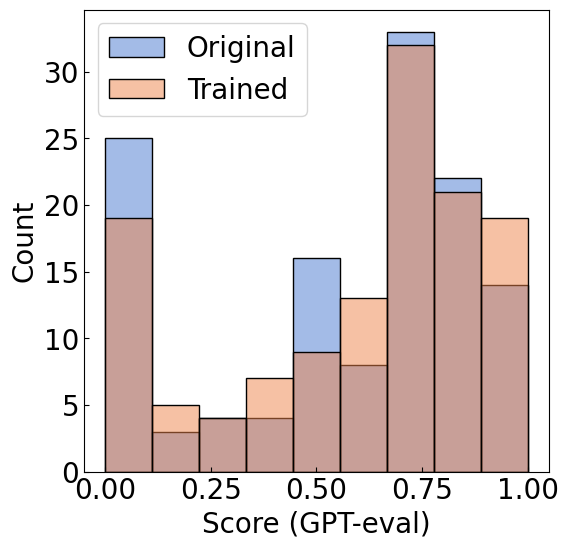

In [31]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [6, 6]
sns.set_palette("muted")
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
df=pd.DataFrame(comparison_list)
sns.histplot(df["Score (original)"],alpha=0.5,label="Original")
sns.histplot(df["Score (trained)"],alpha=0.5,label="Trained")
plt.legend()
plt.xlabel("Score (GPT-eval)")

In [32]:

df.describe()

Score (original)  Score (trained)
count        129.000000       129.000000
mean           0.547287         0.580620
std            0.314761         0.302871
min            0.000000         0.000000
25%            0.400000         0.400000
50%            0.700000         0.700000
75%            0.800000         0.800000
max            1.000000         1.000000

In [34]:
df.to_csv("bayes/results/gpteval/7b.csv")